<a href="https://colab.research.google.com/github/Selinalkan/GitPractice/blob/main/Word_clouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import csv
import nltk
import string

# **Interviewer with Context**

In [ ]:
#Importing ER_c_Transcript Dataset and dropping the Unnamed column
df = pd.read_csv("ER_c_transcript.csv").drop("Unnamed: 0", axis=1)

In [ ]:
#Checking the Data
df.head()

,speaker_trustworthy,speaker_trusts conversational partner,ER_text
0,4.333333,2.666667,"""Something you've said repeatedly is that you ..."
1,4.333333,2.333333,"""What's the data? Give us an example. What, wh..."
2,3.333333,3.666667,And what are those?'
3,3.666667,3.333333,"Alright, so let me get this right. You offered..."
4,3.666667,3.333333,"And that was a big thing, right? Was rejoining..."


**Why I did what I did:**

I wanted to join all the rows of ER_text data that got a score higher than 2.5 for each of the features (speaker_trustworthy and speaker_trusted by conversational partner); however, I have found out that the scores given in the CSV file are of type numpy.float64, and that I could not evaluate them against Python integers. 

Since I wanted to create the word clouds out of an equal number of rows per feature, I sorted the rows based on speaker_trustworthy and speaker_trusts_conversational_partner ratings, and joined only the first 10 rows of each with the highest scores.

Below, I create one word cloud per label, that is two word clouds per transcript, and a total of 8 word clouds.

In [ ]:
#Sorting the data by "speaker_trustworthy" values
df_sorted1 = df.sort_values("speaker_trustworthy", ascending=False)
#Sorting the data by "speaker_trusted by conversational partner" values
df_sorted2 = df.sort_values("speaker_trusts conversational partner", ascending=False)

In [ ]:
df_sorted1.head(10)

,speaker_trustworthy,speaker_trusts conversational partner,ER_text
0,4.333333,2.666667,"""Something you've said repeatedly is that you ..."
22,4.333333,1.666667,"""Yeah. You write about the importance of guard..."
21,4.333333,3.000000,"""Yeah, good news there. OK, so we can still ha..."
14,4.333333,3.000000,"""You don't know how I was as a kid."""
1,4.333333,2.333333,"""What's the data? Give us an example. What, wh..."
16,4.000000,1.666667,Makes sense.'
28,4.000000,4.000000,"""And cut to today, where you have, as story sa..."
24,4.000000,1.666667,So you said you had to spend a lot of time mit...
9,4.000000,3.000000,"My question is, since you supported it, why is..."
13,4.000000,1.666667,"""Yeah, you're obviously not an American. We lo..."


In [ ]:
df_sorted2.head(10)

,speaker_trustworthy,speaker_trusts conversational partner,ER_text
5,2.666667,4.666667,If just raising the interest rate could be a g...
28,4.000000,4.000000,"""And cut to today, where you have, as story sa..."
25,3.000000,4.000000,"So is it, is it that, so it, could you say tha..."
2,3.333333,3.666667,And what are those?'
15,3.666667,3.333333,"""Okay, that's interesting. I didn't know that...."
3,3.666667,3.333333,"Alright, so let me get this right. You offered..."
4,3.666667,3.333333,"And that was a big thing, right? Was rejoining..."
26,3.666667,3.333333,"""So we're stuck with gas, until some insane br..."
19,3.666667,3.000000,"""You're trading high minutes, because Russ is ..."
8,3.666667,3.000000,Explain it to me.'


In [ ]:
#Joining the first 10 rows to create 1 word cloud per feature
df_sorted1_joined = " ".join(df_sorted1.ER_text[:10])
df_sorted2_joined = " ".join(df_sorted2.ER_text[:10])

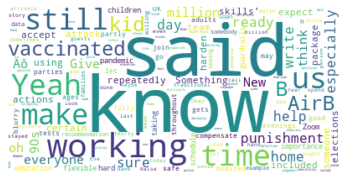

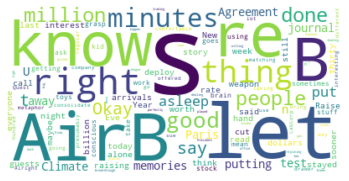

In [ ]:
# Generating word cloud for speaker_trustworthy (df_sorted1_joined)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted1_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generating word cloud for speaker_trusts (df_sorted2_joined)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted2_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Interviewer without Context**

In [ ]:
#Importing ER_c_Transcript Dataset and dropping the Unnamed column
df = pd.read_csv("ER_nc_transcript.csv").drop("Unnamed: 0", axis=1)

In [ ]:
#Checking the Data
df.head()

,speaker_trustworthy,speaker_trusts conversational partner,ER_text
0,3.000000,3.000000,"""Something you've said repeatedly is that you ..."
1,3.333333,4.333333,"""What's the data? Give us an example. What, wh..."
2,3.333333,2.000000,And what are those?'
3,2.666667,3.666667,"Alright, so let me get this right. You offered..."
4,3.000000,3.666667,"And that was a big thing, right? Was rejoining..."


In [ ]:
#Sorting the data by "speaker_trustworthy" values
df_sorted1 = df.sort_values("speaker_trustworthy", ascending=False)
#Sorting the data by "speaker_trusts conversational partner" values
df_sorted2 = df.sort_values("speaker_trusts conversational partner", ascending=False)

In [ ]:
#Joining the first 10 rows to create 1 word cloud per feature
df_sorted1_joined = " ".join(df_sorted1.ER_text[:10])
df_sorted2_joined = " ".join(df_sorted2.ER_text[:10])

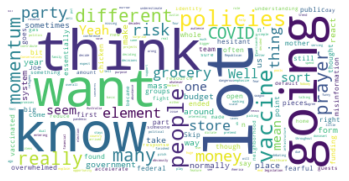

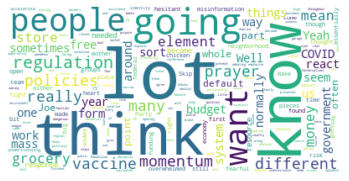

In [ ]:
# Generating word cloud for speaker_trustworthy
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted1_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generating word cloud for speaker_trusts
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted2_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Interviewee with Context**

In [ ]:
#Importing ER_c_Transcript Dataset and dropping the Unnamed column
df = pd.read_csv("EE_c_transcript.csv").drop("Unnamed: 0", axis=1)

In [ ]:
#Checking the Data
df.head()

,speaker_trustworthy,speaker_trusted by conversational partner,ER_text
0,4.000000,1.666667,"""The United States will always be my home, and..."
1,4.000000,2.000000,"""We've just questioned a bunch of the, of the ..."
2,3.000000,3.666667,"""We are quantifying it and it's having a real ..."
3,4.000000,2.333333,"""Absolutely not. We're incredibly blessed to h..."
4,2.333333,3.333333,"He did. And kind of the big, overall one was a..."


In [ ]:
#Sorting the data by "speaker_trustworthy" values
df_sorted1 = df.sort_values("speaker_trustworthy", ascending=False)
#Sorting the data by "speaker_trusts conversational partner" values
df_sorted2 = df.sort_values("speaker_trusted by conversational partner", ascending=False)

In [ ]:
#Joining the first 10 rows to create 1 word cloud per feature
df_sorted1_joined = " ".join(df_sorted1.ER_text[:10])
df_sorted2_joined = " ".join(df_sorted2.ER_text[:10])

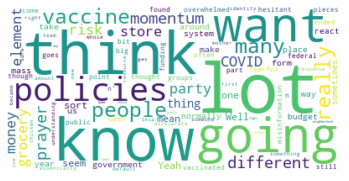

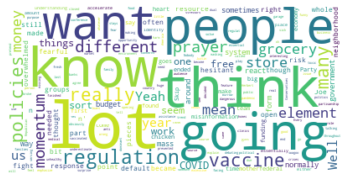

In [ ]:
# Generating word cloud for speaker_trustworthy
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted1_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generating word cloud for speaker_trusted
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted2_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Interviewee without Context**

In [ ]:
#Importing ER_c_Transcript Dataset and dropping the Unnamed column
df = pd.read_csv("EE_nc_transcript.csv").drop("Unnamed: 0", axis=1)

In [ ]:
#Checking the Data
df.head()

,speaker_trustworthy,speaker_trusted by conversational partner,ER_text
0,3.333333,3.333333,"""The United States will always be my home, and..."
1,4.000000,3.666667,"""We've just questioned a bunch of the, of the ..."
2,2.000000,2.000000,"""We are quantifying it and it's having a real ..."
3,3.000000,2.666667,"""Absolutely not. We're incredibly blessed to h..."
4,3.333333,2.333333,"He did. And kind of the big, overall one was a..."


In [ ]:
#Sorting the data by "speaker_trustworthy" values
df_sorted1 = df.sort_values("speaker_trustworthy", ascending=False)
#Sorting the data by "speaker_trusts conversational partner" values
df_sorted2 = df.sort_values("speaker_trusted by conversational partner", ascending=False)

In [ ]:
#Joining the first 10 rows to create 1 word cloud per feature
df_sorted1_joined = " ".join(df_sorted1.ER_text[:10])
df_sorted2_joined = " ".join(df_sorted2.ER_text[:10])

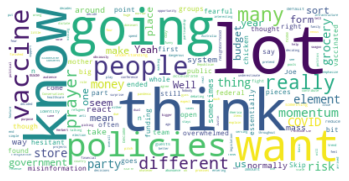

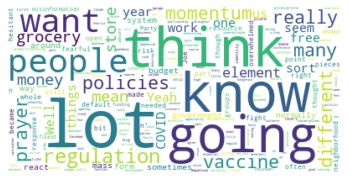

In [ ]:
# Generating word cloud for speaker_trustworthy
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted1_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generating word cloud for speaker_trusted
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df_sorted2_joined)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()